Environment versions:
Matplotlib 3.7.1
Numpy 1.23.5
Pandas 1.5.3
Python 3.11.3
Seaborn 0.12.2
Fuzzywuzzy 0.18.0

Cleaning performed 03/12/2023, 9.30am.

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

In [2]:
df = pd.read_csv('census11.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


In [3]:
#.isna() command tells us which entries are nulls. The sum command on the end adds them all up
df.isna().sum()
#Marital status and Religion have null values

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1975
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2012
dtype: int64

Citation for ydata_profiling: 

(n. d.) YData profiling. Available online: https://docs.profiling.ydata.ai/4.6/ [Accessed 26/11/2023].

In [4]:
#Using EDA package Pandas profiling to generate report to take a closer look at the data
#from ydata_profiling import ProfileReport
profile_report = ProfileReport(df, title="Census Report")
#Save report to html
profile_report.to_file("Census Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Can also use EDA package Sweetviz to generate report 
#import sweetviz as sv
report_sv = sv.analyze(df)
report_sv.show_html()

See corresponding notes for cleaning of each series in df.

For all series with object data type (except house number (int)) firstly going to strip whitespaces from string data

In [5]:
#Select only object columns/series
object_columns = df.select_dtypes(include='object').columns

#Strip whitespaces from non-empty strings in all object columns/series
#Using a lambda function for this
df[object_columns] = df[object_columns].applymap(lambda x: x.strip() if isinstance(x, str) and x.strip() != '' else x)

**Age**

In [6]:
#Rename Age series to Age (years) to include units
df.rename(columns={'Age': 'Age (years)'}, inplace=True)

Citation for age of oldest person: 

BBC Science Focus (2023) Who is the oldest person in the world in 2023? Available online: https://www.sciencefocus.com/the-human-body/oldest-person-in-the-world [Accessed 26/11/2023].

Oldest person was 122 years old when they died.

In [7]:
#Give the unique entries for Age series
df['Age (years)'].unique()
#There are floats, and the series is object. Needs converting to integer.
#Empty strings also
#No negative values and no-one over 122 years old (oldest is 116)
#There are 10 instances of input =>100

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '59.782817341882584', '9.0',
       '102', '103', ' ', '100', '104', '106', '59.841399743989754',
       '63.841399743989754', '107', '75.27548655560247',
       '21.999999999999993', '17.999999999999993'], dtype=object)

In [8]:
#Print number of empty strings
(df['Age (years)'] == ' ').sum()

1

In [9]:
#First deal with empty string converting to NaN
#Use .to_numeric() with coerce errors
df['Age (years)'] = pd.to_numeric(df['Age (years)'], errors='coerce')

#Calculate the median age
median_age = df['Age (years)'].median()
print(median_age)

#Replace NaN values with the median age
df['Age (years)'].fillna(median_age, inplace=True)

#Convert floats to integers
df['Age (years)'] = df['Age (years)'].astype(np.int64)
print(df['Age (years)'].dtype)
#Coverted to int64 using 'np.int64' explicitly in the astype method
#Did this for consistency as other int series are int64

df['Age (years)'].unique()

36.0
int64


array([ 41,  11,   7,  40,  35,  19,  17,  60,  62,  30,  42,  46,   4,
        78,  81,  43,  44,  24,  57,  53,  32,  12,   9,  85,  58,  59,
        26,  90,  97,  63,  18,  15,  10,  47,  16,  13,  36,   6,   2,
         1,  25,  56,  38,  21,  31,  74,  67,  65,  71,  79,  45,  61,
        72,  54,  33,  34,  23,  28,  29,  91,  64,  80,  76,  49,  73,
        50,  84,  75,  48,  14,  51,  22,  66,  20,  77,   0,  27,  86,
        68,   5,  83,  55,  69,  70,  39,  82,  88,  37,  52,   8,   3,
        87, 105,  95,  96,  89,  92,  93,  99, 101,  98, 116, 112,  94,
       102, 103, 100, 104, 106, 107], dtype=int64)

In [10]:
#Just sense checking 116 year old person
#Has husband that is 112 years old and lots of sons and daughters!
df[df['Age (years)'] == 116]
matching_records = df[(df['House Number'] == 13) & (df['Street'] == 'Davies Avenue')]
print(matching_records)

      House Number         Street First Name          Surname  Age (years)  \
2270            13  Davies Avenue    Annette         Thompson          116   
2271            13  Davies Avenue     Mathew         Thompson          112   
2272            13  Davies Avenue       Ross         Thompson           94   
2273            13  Davies Avenue   Ashleigh         Thompson           91   
2274            13  Davies Avenue       Liam         Thompson           88   
2275            13  Davies Avenue      Debra         Thompson           84   
2276            13  Davies Avenue    Stephen         Thompson           81   
2277            13  Davies Avenue   Victoria         Thompson           80   
2278            13  Davies Avenue    Leonard         Thompson           76   
2279            13  Davies Avenue      Alice         Thompson           75   
2280            13  Davies Avenue       Tina         Thompson           74   
2281            13  Davies Avenue      Shane         Thompson   

Citation for Marriage and Civil Partnership (Minimum Age) Act 2022: 

GOV.UK (n. d.) Marriage and civil partnership (minimum age) act 2022. Available online: https://www.legislation.gov.uk/ukpga/2022/28/enacted [Accessed 26/11/2023].

States that it is illegal for anyone under 18 to get married, even with parental consent.
Legislation in place from 27 February 2023.

Citation for Marriage Act, 1949:s3: 

GOV.UK (n. d.) Marriage act 1949. Available online: https://www.legislation.gov.uk/ukpga/Geo6/12-13-14/76/section/3 [Accessed 26/11/2023].

Legal to marry at 16 with parental consent. Legislation in place until Marriage and Civil Partnership (Minimum Age) Act 2022 brought in.

Citation for children moving out before 18:

NSPCC (2023) Moving out. Available online: https://www.nspcc.org.uk/keeping-children-safe/in-the-home/moving-out/ [Accessed 26/11/2023].

For those under 18 who do not live with another over 18 in the household, it is legal to move out of a family home before 18 (but parents still responsible for wellbeing until 18).

In [11]:
#I can look for underage parents by filtering by age (under 18) and looking for those that are Head of household
#Filter for people who are also the head of the household aged under 18
under18_head_of_household = df[(df['Age (years)']< 18) &
                                ((df['Gender'] == 'Male') | (df['Gender'] == 'Female')) &
                                (df['Relationship to Head of House'] == 'Head')]

print(under18_head_of_household)

#For record 4919, aged 15 they have Married status- not legal- so removing this household from the dataset completely (small impact)
#Valerie Smith does not have children' but lives with a lodger and husband both over 18
print(df[(df['House Number'] == 11) & (df['Street'] == 'Arrows Mission')])

#Record 7637, Fiona Gordan
print(df[(df['House Number'] == 11) & (df['Street'] == 'Aethelred Heights')])
#Has a child (aged 0), unmarried and lives with partner and visitor, both over 18

#Record 4171, Abigail Begum
print(df[(df['House Number'] == 31) & (df['Street'] == 'Chan Estate')])
#Married at age 17, which under new legislation is against the law
#Can't determine whether she got married before 27 February 2023, when it was legal to marry at 16 or 17 with parental consent (Marriage Act, 1949:s3)
#Has a child (aged 0), lives with husband and cousin, both over 18
#Removing this household from the dataset completely (small impact)

#Record 7508, Chloe Lewis
print(df[(df['House Number'] == 14) & (df['Street'] == 'Daffodilhatch Street')])
#For record 7508 already divorced!
#7508 is 16 and has a child aged 0- underage parent, doesn't live with anyone else over 18.
#For those under 18 who do not live with another over 18 in the household, it is legal to move out of a family home before 18 (https://www.nspcc.org.uk/keeping-children-safe/in-the-home/moving-out/).

      House Number                Street First Name Surname  Age (years)  \
4171            31           Chan Estate    Abigail   Begum           17   
4919            11        Arrows Mission    Valerie   Smith           15   
7508            14  Daffodilhatch Street      Chloe   Lewis           16   
7637            11     Aethelred Heights      Fiona  Gordon           17   

     Relationship to Head of House Marital Status  Gender  Occupation  \
4171                          Head        Married  Female     Student   
4919                          Head        Married  Female     Student   
7508                          Head       Divorced  Female  Unemployed   
7637                          Head         Single  Female     Student   

     Infirmity Religion  
4171      None      NaN  
4919      None      NaN  
7508      None      NaN  
7637      None      NaN  
      House Number          Street First Name  Surname  Age (years)  \
4919            11  Arrows Mission    Valerie    Smi

Removes seven records and is not deemed significant to the overall analysis.

In [12]:
#Remove the 3 records at 11 Arrow Mission (4919, 4920 and 4921) (Valerie Smith Household, underage marriage)
df = df[~((df['House Number'] == 11) & (df['Street'] == 'Arrows Mission'))]

In [13]:
#Remove the 4 records at 31 Chan Estate (4171-4714) (Abigail Begum, underage marriage (no longer legal with parental consent under 18))
df = df[~((df['House Number'] == 31) & (df['Street'] == 'Chan Estate'))]

In [14]:
#Group ages by age ranges (5 year intervals)
#Define the age bins and labels (ranges)
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104', '105-109', '110-114', '115-119']

#Create a new column in df to assign age groups
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

In [15]:
#Checking for uncategorised ages in df
missing_age_groups = df[df['Age Group'].isna()]
print(missing_age_groups)

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age (years), Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []


In [16]:
#Convert Age Group datatype (category) to object
df['Age Group'] = df['Age Group'].astype(str)

#Remove possible whitespaces
df['Age Group'] = df['Age Group'].str.strip()

**Religion**

In [17]:
#Gives the count of each Religion in df
df['Religion'].value_counts()

#There are 2 empty strings 
#NaN inputs, also 'None' category
#'Private', 'Housekeeper' and 'Jedi' inputs
#Is Buddist spelt correctly?
#Any children with religion?

None           2838
Christian      1956
Catholic        884
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
                  2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Name: Religion, dtype: int64

In [18]:
#Print number of NaN values
nan_count_before = df['Religion'].isnull().sum()

#Print number of empty strings, considering potential whitespaces using str.strip()
empty_string_count = (df['Religion'].str.strip() == '').sum()

#Print the count of NaN values and empty strings before the changes
print("Before changes:")
print("NaN count:", nan_count_before)
print("Empty string count:", empty_string_count)

#Calculate mode of the 'Religion' series (which may include NaN) using .values[0]
mode_religion = df['Religion'].mode().values[0]
print("Mode of religion:", mode_religion)

#Replace only empty strings with the calculated mode
df.loc[df['Religion'].str.strip() == '', 'Religion'] = mode_religion

#Recalculate the count of empty strings after the changes
empty_string_count_after = (df['Religion'].str.strip() == '').sum()

#Print the count of NaN values and empty strings after the changes
nan_count_after = df['Religion'].isnull().sum()
print("After changes:")
print("NaN count:", nan_count_after)
print("Empty string count after:", empty_string_count_after)

#Print the unique values in the 'Religion' column after the changes
print("Unique values in 'Religion' column:")
print(df['Religion'].unique())

Before changes:
NaN count: 2008
Empty string count: 2
Mode of religion: None
After changes:
NaN count: 2008
Empty string count after: 0
Unique values in 'Religion' column:
['Catholic' nan 'Methodist' 'None' 'Christian' 'Jewish' 'Sikh' 'Muslim'
 'Buddist' 'Quaker' 'Housekeeper' 'Jedi' 'Pagan' 'Private' 'Orthodoxy']


In [19]:
#Updated count by Religion
religion_counts = df['Religion'].value_counts()
print(religion_counts)

None           2840
Christian      1956
Catholic        884
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Name: Religion, dtype: int64


Private and Housekeeper are not religions.

Jedi also not a religion as declared by the Charity Commission:

GOV.UK (n. d.) Decision of the charity commission on the temple of the jedi order. Available online: https://www.gov.uk/government/publications/the-temple-of-the-jedi-order [Accessed 26/11/2023].

Buddist should be spelt Buddhist- assume a typo - check is same household.

Britannica (2023) Buddhism. Available online: https://www.britannica.com/topic/Buddhism [Accessed 26/11/2023].

Other low frequency religions:

Orthodoxy is a form of Christian religion.

Britannica (2023) Orthodox. Available online: https://www.britannica.com/topic/orthodox [Accessed 26/11/2023].

Quakers are a Christian group (more of a way of life).

Britannica (2023) Quaker. Available online: https://www.britannica.com/topic/Quaker [Accessed 26/11/2023].

Pagan also Christian.

Britannica (2023) Paganism. Available online: https://www.britannica.com/topic/paganism [Accessed 26/11/2023].

For those with false religions-

a) Could check the religions of others in household, if any, and impute this- may not be correct but sensible guess

b) Failing a) input 'None'

c) If deliberately misleading or deemed to be one-off errors use a) or b)

In [20]:
#Identify all records with Jedi as religion
jedi_records = df[df['Religion'] == 'Jedi']
print(jedi_records)

#Filter records for the specified 'House Number' and 'Street'
print(df[(df['House Number'] == 56) & (df['Street'] == 'Harvey Road')])

#Son David also lives in the house of the Jedi worshippers with Religion 'None' 
#So convert 2 'Jedi' entries to None
df['Religion'].replace('Jedi', 'None', inplace=True)

      House Number       Street  First Name  Surname  Age (years)  \
3033            56  Harvey Road  Jacqueline  Knowles           61   
3034            56  Harvey Road        Carl  Knowles           63   

     Relationship to Head of House Marital Status  Gender  \
3033                          Head        Married  Female   
3034                       Husband        Married    Male   

                 Occupation Infirmity Religion Age Group  
3033      Nurse, children's      None     Jedi     60-64  
3034  Accounting technician      None     Jedi     60-64  
      House Number       Street  First Name  Surname  Age (years)  \
3033            56  Harvey Road  Jacqueline  Knowles           61   
3034            56  Harvey Road        Carl  Knowles           63   
3035            56  Harvey Road       David  Knowles           17   

     Relationship to Head of House Marital Status  Gender  \
3033                          Head        Married  Female   
3034                       Husba

In [21]:
#Filter out record where Religion is Housekeeper
housekeeper_records = df[df['Religion'] == 'Housekeeper']
print(housekeeper_records)

#Occupation here is "Best boy"
#Anyone else living in the household (he indicated he is married)
#Filter records for the specified 'House Number' and 'Street'
print(df[(df['House Number'] == 9) & (df['Street'] == 'Barlow Crescent')])

#None for religion for other members of household so set Housekeeper to None
df['Religion'].replace('Housekeeper', 'None', inplace=True)

      House Number           Street First Name Surname  Age (years)  \
2776             9  Barlow Crescent      Bryan  Austin           31   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
2776                          Head        Married   Male   Best boy      None   

         Religion Age Group  
2776  Housekeeper     30-34  
      House Number           Street First Name Surname  Age (years)  \
2776             9  Barlow Crescent      Bryan  Austin           31   
2777             9  Barlow Crescent      Lydia  Austin           23   
2778             9  Barlow Crescent      Jemma  Austin            0   

     Relationship to Head of House Marital Status  Gender  \
2776                          Head        Married    Male   
2777                          Wife        Married  Female   
2778                      Daughter            NaN  Female   

                   Occupation Infirmity     Religion Age Group  
2776                 Best boy      None

In [22]:
#Filter out record where Religion is Private
private_records = df[df['Religion'] == 'Private']
print(private_records)

#Private may mean they don't want to diclose
#Anyone else living in his household?
#Filter records for the specified 'House Number' and 'Street'
print(df[(df['House Number'] == 65) & (df['Street'] == 'Manor Flats')])

#No other occupiers of household, assign to NaN as 'Private' indicates it is not 'None', rather undeclared.
df['Religion'].replace('Private', np.nan, inplace=True)

      House Number       Street First Name Surname  Age (years)  \
5645            65  Manor Flats       June    Bull           19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
5645                          Head         Single  Female  University Student   

     Infirmity Religion Age Group  
5645      None  Private     15-19  
      House Number       Street First Name Surname  Age (years)  \
5645            65  Manor Flats       June    Bull           19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
5645                          Head         Single  Female  University Student   

     Infirmity Religion Age Group  
5645      None  Private     15-19  


In [23]:
#Change Buddist to Buddhist
buddist_records = df[df['Religion'] == 'Buddist']
print(buddist_records)

df['Religion'].replace('Buddist', 'Buddhist', inplace=True)
df['Religion'].value_counts()

      House Number         Street First Name Surname  Age (years)  \
367            180     Smith Port      Shane  Howard           19   
368            180     Smith Port      Carly  Howard           19   
2448            35  Davies Avenue       Tony    Hall           51   

     Relationship to Head of House Marital Status  Gender          Occupation  \
367                           Head        Married    Male  University Student   
368                           Wife        Married  Female  University Student   
2448                          None         Single    Male   Freight forwarder   

     Infirmity Religion Age Group  
367       None  Buddist     15-19  
368       None  Buddist     15-19  
2448      None  Buddist     50-54  


None         2843
Christian    1956
Catholic      884
Methodist     499
Muslim         97
Sikh           40
Jewish         36
Buddhist        3
Quaker          1
Pagan           1
Orthodoxy       1
Name: Religion, dtype: int64

In [24]:
#Want to know how many under 16s have an associated religion
#Print religion for any under 16s where not NaN
under_16_religion = df[(df['Age (years)'] < 16) & df['Religion'].notnull()]
print(under_16_religion)

#Only one instance for anyone under 16 where religion is 'None' rather than NaN
#Convert all under 16 religions to Undeclared
df.loc[df['Age (years)'] < 16, 'Religion'] = 'Undeclared'

df['Religion'].value_counts()

#The 'None' inputs are now all adults (16 and over)

      House Number           Street   First Name Surname  Age (years)  \
7487            58  Canterbury Well  Christopher    Cole           15   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
7487                           Son            NaN   Male    Student      None   

     Religion Age Group  
7487     None     15-19  


None          2842
Christian     1956
Undeclared    1748
Catholic       884
Methodist      499
Muslim          97
Sikh            40
Jewish          36
Buddhist         3
Quaker           1
Pagan            1
Orthodoxy        1
Name: Religion, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 0 to 8376
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6396 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
dtypes: int64(2), object(10)
memory usage: 850.1+ KB


**Marital Status**

In [26]:
df['Marital Status'].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', ' '], dtype=object)

In [27]:
df['Marital Status'].value_counts()

Single      2997
Married     2220
Divorced     791
Widowed      387
               1
Name: Marital Status, dtype: int64

In [28]:
#Identify record with empty string
#Strip white spaces first
empty_string_marital_status = df[df['Marital Status'].str.strip() == '']
print(empty_string_marital_status)

#Assign Single (rather than NaN) to empty string (only 1 instance)
#Strip leading and trailing whitespaces, then replace empty strings with Single in the Marital Status column
df['Marital Status'] = df['Marital Status'].str.strip().replace('', 'Single')

#Now i want to see all participants 18 years old or older have NaN as Marital Status
print(df[(df['Age (years)'] >= 18) & (pd.isna(df['Marital Status']))])

      House Number       Street First Name Surname  Age (years)  \
4230            47  Chan Estate     Norman    Ward           25   

     Relationship to Head of House Marital Status Gender     Occupation  \
4230                           Son                  Male  Administrator   

     Infirmity Religion Age Group  
4230      None     None     25-29  
Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age (years), Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []


In [29]:
#Now i want to see if any under 18 are widowed
#Filter df for individuals under 18 and widowed
under_18_widowed = df[(df['Age (years)'] < 18) & (df['Marital Status'] == 'Widowed')]
print(under_18_widowed)

#No individuals widowed under 18

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age (years), Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []


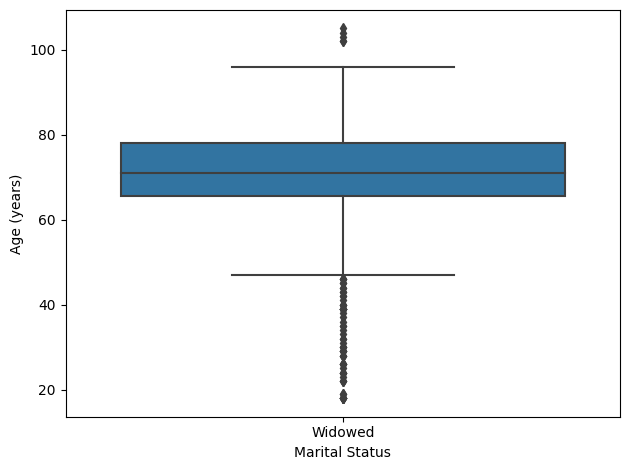

In [30]:
#Filter data for Widowed in Marital Status
widowed_data = df[df['Marital Status'] == 'Widowed']

#Create a boxplot using seaborn
sns.boxplot(x='Marital Status', y='Age (years)', data=widowed_data)

plt.xlabel('Marital Status')
plt.ylabel('Age (years)')
plt.tight_layout()

plt.show()

In [31]:
#Now i want to see if any 18 year olds are widowed
#Filter df for individuals aged 18 and widowed
widowed_18 = df[(df['Age (years)'] == 18) & (df['Marital Status'] == 'Widowed')]
print(widowed_18)

#7 individuals widowed aged 18, impute these to Single as although possible, quite unlikely (see box plot above)
df.loc[(df['Age (years)'] == 18) & (df['Marital Status'] == 'Widowed'), 'Marital Status'] = 'Single'

      House Number             Street First Name    Surname  Age (years)  \
914             80   Cambridge Street       Carl      Price           18   
1390             1        Yucca Drive    Gregory  Wilkinson           18   
1787             1       Khan Village      Diane     Powell           18   
3454             4        Willow Road     Justin     Harris           18   
5313            29       Green Spring     Gordon      Hayes           18   
7658            16  Aethelred Heights      Aimee     Brooks           18   
8367             1       Howard House   Jennifer     Bryant           18   

     Relationship to Head of House Marital Status  Gender Occupation  \
914                           None        Widowed    Male    Student   
1390                           Son        Widowed    Male    Student   
1787                      Daughter        Widowed  Female    Student   
3454                           Son        Widowed    Male    Student   
5313                           

In [32]:
#Filter df for individuals under 18 and divorced
under_18_divorced = df[(df['Age (years)'] < 18) & (df['Marital Status'] == 'Divorced')]
print(under_18_divorced)

#One individual divorced under 18, Chloe Lewis aged 16
#Identified already as underage parent

      House Number                Street First Name Surname  Age (years)  \
7508            14  Daffodilhatch Street      Chloe   Lewis           16   

     Relationship to Head of House Marital Status  Gender  Occupation  \
7508                          Head       Divorced  Female  Unemployed   

     Infirmity Religion Age Group  
7508      None      NaN     15-19  


In [33]:
#Filter df for individuals under 18 and married
under_18_married = df[(df['Age (years)'] < 18) & (df['Marital Status'] == 'Married')]
print(under_18_married)

#Confirms all illegal marriages have been dealt with

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age (years), Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []


In [34]:
#Filter df for individuals under 18 and single
under_18_single = df[(df['Age (years)'] < 18) & (df['Marital Status'] == 'Single')]
print(under_18_single)

#For Record 7637, Fiona Gordan, print entire household
print(df[(df['House Number'] == 11) & (df['Street'] == 'Aethelred Heights')])
#Has a child (aged 0), lives with partner and visitor, both over 18
#Identified previously as underage mother

#Ok to live in household with over 18s as 17 year old, but because under 18 Single status will be changed to NaN
#Change the Marital Status for record 7637 to NaN
df.loc[7637, 'Marital Status'] = np.nan
print(df.loc[7637])

      House Number             Street First Name Surname  Age (years)  \
7637            11  Aethelred Heights      Fiona  Gordon           17   

     Relationship to Head of House Marital Status  Gender Occupation  \
7637                          Head         Single  Female    Student   

     Infirmity Religion Age Group  
7637      None      NaN     15-19  
      House Number             Street First Name Surname  Age (years)  \
7637            11  Aethelred Heights      Fiona  Gordon           17   
7638            11  Aethelred Heights      Simon   Price           22   
7639            11  Aethelred Heights    Harriet  Gordon            0   
7640            11  Aethelred Heights     Kieran  Taylor           28   

     Relationship to Head of House Marital Status  Gender  \
7637                          Head         Single  Female   
7638                       Partner         Single    Male   
7639                      Daughter            NaN  Female   
7640                      

In [35]:
df['Marital Status'].value_counts()

Single      3004
Married     2220
Divorced     791
Widowed      380
Name: Marital Status, dtype: int64

**Street**

In [36]:
df['Street'].unique()
#All entries have same format

array(['Regentchain Avenue', 'Telegraphnet Street', 'Smith Port',
       'Trent Crescent', 'Vulture Pike', 'November Falls',
       'Cambridge Street', 'Sutton Rapid', 'Taylor Grove', 'Price Isle',
       'Ward Avenue', 'Wharf Track', 'Wales Locks', 'Marshall Lodge',
       'Yucca Drive', 'Power Keys', 'Brady Creek', 'Earlsplit Drive',
       'Khan Village', 'Cooper Track', 'Pickering Summit', 'Osborne Road',
       'Hammond Lane', 'Davies Avenue', 'William Bypass', 'White Island',
       'Leach Tunnel', 'Oyster Drive', 'Barlow Crescent', 'Harvey Road',
       'Roberts Inlet', 'Willow Road', 'Rogers Plains',
       'Capricorn Throughway', 'Pendragon Lane', 'Chan Estate',
       'Jones Ramp', 'Ebor Street', 'Whitehall Crescent', 'Clark Street',
       'Friary Avenue', 'Elliott Lane', 'Duchesshatch Avenue',
       'Ahmed Spur', 'Anvilgain Road', 'Arrows Mission', 'Bryan Road',
       'Fitzgerald Road', 'Leeds Crossing', 'Green Spring', 'Paper Place',
       'Evans Light', 'Bishop Shoal',

**Relationship to Head of House**

In [37]:
df['Relationship to Head of House'].unique()
#Formatting fine
#No empty strings
#No NaN

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'None', 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Neice', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

In [38]:
#'Neice' is mispelt, convert to 'Niece'
#regex=True makes sure that the replacement is case-sensitive
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Neice', 'Niece', regex=True)
df['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'None', 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Niece', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

**Gender**

In [39]:
df['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [40]:
#Identify records with empty or whitespace string (3 instances)
empty_gender = df[df['Gender'].str.strip() == '']
print(empty_gender)

      House Number           Street First Name  Surname  Age (years)  \
1002             1     Taylor Grove     Pamela  Edwards           69   
6899             8     Tiger Avenue     Leanne     Gill           22   
7348            25  Canterbury Well      Irene   Harvey           51   

     Relationship to Head of House Marital Status Gender  \
1002                          Head        Married          
6899                          None         Single          
7348                          Head        Married          

                             Occupation Infirmity   Religion Age Group  
1002  Retired Engineer, technical sales      None  Christian     65-69  
6899                 University Student      None       None     20-24  
7348                  Librarian, public      None  Christian     50-54  


In [41]:
#All female first name, no NA option, so can assume input error here, and convert all 3 records to Female
#Replace empty strings with Female in the Gender series
df['Gender'] = df['Gender'].str.strip().replace('', 'Female')

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Infirmity**

In [42]:
df['Infirmity'].unique()

array(['None', 'Blind', ' ', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

In [43]:
#Identify records with empty or whitespace string (13 instances)
empty_infirmity = df[df['Infirmity'].str.strip() == '']
print(empty_infirmity)

      House Number                  Street First Name     Surname  \
102              2              Smith Port      Reece      Knight   
258            106              Smith Port    Raymond     Brookes   
1593            26             Brady Creek       Adam      Hewitt   
4053            20          Pendragon Lane      Diane        Rees   
5554            12             Manor Flats      Garry  Williamson   
5637            60             Manor Flats    Vincent      Walker   
5730             2           Hewitt Avenue     Teresa       Jones   
5802             3    CherryChestnut Spurs     Victor    Fletcher   
5807             5    CherryChestnut Spurs    Valerie       Dixon   
6681            65  ExcaliburBellsby Drive     Hannah    Charlton   
7034            38         Squirrel Street  Francesca       Green   
7456            52         Canterbury Well        Lee       Bowen   
8027            27          Snapdragon Run      Shane      Bailey   

      Age (years) Relationship to

In [44]:
#No way of knowing if disabled or not, so just assigned 'None' to 13 entries
#Replace empty strings with 'None' in the Infirmity series
df['Infirmity'] = df['Infirmity'].str.strip().replace('', 'None')

df['Infirmity'].unique()

array(['None', 'Blind', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

**First Name**

In [45]:
#Identify records with empty or whitespace string (1 instance)
empty_firstname = df[df['First Name'].str.strip() == '']
print(empty_firstname)

#Replace empty string with 'Unknown' in the "First Name" series
df['First Name'] = df['First Name'].str.strip().replace('', 'Unknown')

      House Number      Street First Name Surname  Age (years)  \
1497             4  Power Keys              Frost           88   

     Relationship to Head of House Marital Status Gender  \
1497                          Head        Widowed   Male   

                               Occupation Infirmity   Religion Age Group  
1497  Retired Civil Service fast streamer      None  Methodist     85-89  


In [46]:
#Filter for records where First Name has two words without a hyphen
two_words_no_hyphen_firstname = df[df['First Name'].str.contains(r'^\S+\s+\S+$')]
print(two_words_no_hyphen_firstname[['First Name']])
#No hyphenated names in this series and no hyphens need adding

Empty DataFrame
Columns: [First Name]
Index: []


**Surname**

In [47]:
#Identify records with empty or whitespace string (2 instances)
empty_surname = df[df['Surname'].str.strip() == '']
print(empty_surname)

#2 daughters, look up households to potentially impute surnames from others in house
print(df[(df['House Number'] == 8) & (df['Street'] == 'Telegraphnet Street')])
print(df[(df['House Number'] == 48) & (df['Street'] == 'Chan Estate')])

#For record 60 imputing 'Patel' and for record 4236 imputing 'Lloyd'
#Change the Surname for record 60 to 'Patel'
df.loc[60, 'Surname'] = 'Patel'
df.loc[4236, 'Surname'] = 'Lloyd'

print(df.loc[[60, 4236], 'Surname'])

      House Number               Street First Name Surname  Age (years)  \
60               8  Telegraphnet Street      Linda                   41   
4236            48          Chan Estate     Denise                    9   

     Relationship to Head of House Marital Status  Gender  \
60                        Daughter         Single  Female   
4236              Adopted Daughter            NaN  Female   

                          Occupation Infirmity    Religion Age Group  
60    Commercial art gallery manager      None   Christian     40-44  
4236                         Student      None  Undeclared       5-9  
    House Number               Street First Name Surname  Age (years)  \
57             8  Telegraphnet Street     Elaine   Patel           78   
58             8  Telegraphnet Street       Kate   Patel           44   
59             8  Telegraphnet Street     Damien   Patel           42   
60             8  Telegraphnet Street      Linda                   41   
61          

In [48]:
#Filter for records where Surname has two words without a hyphen
two_words_no_hyphen_surname = df[df['Surname'].str.contains(r'^\S+\s+\S+$')]
print(two_words_no_hyphen_surname[['Surname']])
#No hyphens need adding

Empty DataFrame
Columns: [Surname]
Index: []


**Occupation**

Some inputs not helpful e.g. "Make" and "Land", "sub" and "Retired, Best Boy"!, is formatting standardised/consistent? There are stacked entries (with comma), forward slash entries, stuff in brackets. Different length strings. Lots of Retired entries with occupation (helpful!)

Want to classify entries and create new column (Occupation category) e.g. employed, unemployed, retired, child, student).

Citation for legal age for retirement (66): 

Age UK (2023) Changes to state pension age. Available online: https://www.ageuk.org.uk/information-advice/money-legal/pensions/state-pension/changes-to-state-pension-age/ [Accessed 26/11/2023].

In [49]:
#Need to determine if anyone aged 66 or over is listed as unemployed (want to convert these to retired, unemployed (legal age for state pension https://www.ageuk.org.uk/information-advice/money-legal/pensions/state-pension/changes-to-state-pension-age/))
#Convert entries where individuals are 66 or over and 'unemployed' (case insensitive) in the 'Occupation' column to 'Retired Unemployed'
#This also will convert Unemployed as stand alone string or where it is part of a longer string
df.loc[df['Occupation'].str.contains('unemployed', case=False) & (df['Age (years)'] >= 66), 'Occupation'] = 'Retired Unemployed'

In [50]:
#Filter rows with empty or whitespace strings in 'Occupation' column
empty_occupation_rows = df[df['Occupation'].str.strip() == '']
print(empty_occupation_rows)

#Replace empty string with 'Unknown' in 'Occupation'
df['Occupation'] = df['Occupation'].str.strip().replace('', 'Unknown')

      House Number       Street First Name   Surname  Age (years)  \
3399           194  Harvey Road  Josephine  Anderson           73   

     Relationship to Head of House Marital Status  Gender Occupation  \
3399                          Head       Divorced  Female              

     Infirmity   Religion Age Group  
3399      None  Christian     70-74  


In [51]:
#Replace 'Best boy', 'Sub' and 'Make' with 'Unknown'
# Assuming 'Role' is the column where you want to replace values
roles_to_replace = ['Best boy', 'Sub', 'Make']

# Replace specified values in the 'Role' column with 'Unknown'
df['Occupation'] = df['Occupation'].replace(roles_to_replace, 'Unknown')

In [52]:
#Has anyone under 18 put in an occupation in df['Occupation'] that isn't 'child or 'student'?
#Filter for individuals under 18 with occupations other than 'child' or 'student', make case insensitive
under_18_occupation = df[(df['Age (years)'] < 18) & (~df['Occupation'].str.lower().isin(['child', 'student']))]
print(under_18_occupation[['First Name', 'Surname', 'Age (years)', 'Occupation']])

#Chloe Lewis was identified previously as divorced and a single underage mother. 
#She is the head of the household, living alone with her newborn
#She is still living under parental responsibility until even though she lives apart from parents
#Because she is an exception can class as either unemployed (as head of household) or as child, keeping as unemployed

     First Name Surname  Age (years)  Occupation
7508      Chloe   Lewis           16  Unemployed


**Occupation Category**

Include in child category anyone aged under 5 

Include in child (school-age) category anyone aged >= 5 and under 18

Include in student category any string containing 'student' aged 18 or over

Include in retired category any string containing 'retired'

Include in unemployed category any string containing 'unemployed'

Everything else is employed

Citation for definition of child (under age 18): 

NSPCC (2023) Children and the law. Available online: https://learning.nspcc.org.uk/child-protection-system/children-the-law [Accessed 26/11/2023].

In [53]:
#Define a function to classify Occupation
def classify_occupation(row):
    """
    Classify occupation based on age and occupation string.

    Parameters:
    row (pandas.Series): A Pandas Series representing a row of a DataFrame.
    
    Returns:
    str: The classified occupation category.
    """
    occupation_lower = row['Occupation'].lower()
    age = row['Age (years)']

    if age < 5:
        return 'Child'
    elif age >= 5 and age <18:
        return 'Child (School-age)'
    elif 'student' in occupation_lower and age >= 18:
        return 'Student'
    #Will classify 'retired unemployed' as retired because comes before unemployed in function
    elif 'retired' in occupation_lower:
        return 'Retired'
    elif 'unemployed' in occupation_lower:
        return 'Unemployed'
    else:
        return 'Employed'

#Create a new 'Occupation Category' column by applying the function
#axis=1 to apply to rows
df['Occupation Category'] = df.apply(classify_occupation, axis=1)

**Household Occupancy**

Create Household Occupancy column.

Might help with determining size of houses required/over-occupancy etc.

In [54]:
#Use the groupby method to group by 'House Number' and 'Street' 
#Apply transform method to count the number of entries in each group
#Then assign to new column 'Household Occupancy'
df['Household Occupancy'] = df.groupby(['House Number', 'Street'])['First Name'].transform('count')

#Sense check with single household example
print(df[(df['House Number'] == 8) & (df['Street'] == 'Telegraphnet Street')])

    House Number               Street First Name Surname  Age (years)  \
57             8  Telegraphnet Street     Elaine   Patel           78   
58             8  Telegraphnet Street       Kate   Patel           44   
59             8  Telegraphnet Street     Damien   Patel           42   
60             8  Telegraphnet Street      Linda   Patel           41   
61             8  Telegraphnet Street   Patricia   Patel           38   

   Relationship to Head of House Marital Status  Gender  \
57                          Head       Divorced  Female   
58                      Daughter         Single  Female   
59                           Son         Single    Male   
60                      Daughter         Single  Female   
61                      Daughter       Divorced  Female   

                            Occupation Infirmity   Religion Age Group  \
57         Retired Clinical biochemist      None  Christian     75-79   
58                          Translator      None  Christian 

In [55]:
#Reset the index to a new sequential range starting from 0 after deleting rows from cleaning process
#drop=True removes the existing index column
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6395 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
 12  Occupation Category            8370 non-null   object
 13  Hou

In [56]:
df.to_csv('census_11_cleaned.csv')

In [57]:
#Using EDA package Pandas profiling to generate report for cleaned data
#from ydata_profiling import ProfileReport
report_pp = ProfileReport(df, title="Cleaned Census Report")
#Save report to html
report_pp.to_file("Cleaned Census Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Salary**

Want to experiment with fuzzy matching to create a Salary series based on Occupation Series by comparing to ONS annual salaries in UK by occupation.

Data from:

Office for National Statistics (2023) Earnings and hours worked, occupation by four-digit SOC: ASHE Table 14. Available online: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/occupation4digitsoc2010ashetable14 [Accessed 26/11/2023].

It is 2023 data of annual salaries in UK for all occupations (median and mean). Not taking into account gender or full/part time or regional differences in salaries e.g. London vs North.

Fuzzy matching is useful when dealing with variations, misspellings, or different levels of detail in the occupation names.

Need to use 'fuzzywuzzy' library.
pip install fuzzywuzzy

Pypi (2020) fuzzywuzzy 0.18.0. Available online: https://pypi.org/project/fuzzywuzzy/ [Accessed 26/11/2023].

Load ONS Standard Occupational Classification salary data using pandas df.

Have chosen to use median salary for matching rather than mean to account for any skew in data due to outliers.

In [58]:
#Use latin-1 encoding
SOC_df = pd.read_csv('Occupation SOC20 Annual pay Gross 2023_updated.csv')
SOC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Occupation     454 non-null    object
 1   Code           454 non-null    int64 
 2   Median Salary  454 non-null    object
 3   Mean Salary    453 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.3+ KB


In [59]:
#Test on validation random sample of 100 records
#Exclude specified occupations from the entire dataset
employed_occupations = df[df['Occupation Category'] == 'Employed']

#Take a random sample of 100 records for validation
validation_sample = employed_occupations.sample(n=100, random_state=42)

In [60]:
#Define a function for fuzzy matching
def fuzzy_match_occ_validation(occupation):
    """
    Perform fuzzy matching to find the most similar occupation from a reference list.

    Parameters:
    occupation (str): The occupation to be matched.

    Returns:
    str or None: The matched occupation if similarity score is above 60, else None.
    """
    #Skip empty strings
    if not occupation or occupation.isspace():
        return None

    #Perform fuzzy matching
    result, score, _ = process.extractOne(occupation, SOC_df['Occupation'], scorer=fuzz.ratio)

    #Check if the score is above the confidence threshold
    return result if score >= 50 else None  # Confidence threshold

#Apply fuzzy matching and create a new column 'Matched_Occupation' in the validation sample
validation_sample['Matched Occupation'] = validation_sample['Occupation'].apply(fuzzy_match_occ_validation)

#Merge DataFrame based on matched occupations in the validation sample
validation_sample_result = pd.merge(validation_sample, SOC_df, left_on='Matched Occupation', right_on='Occupation', how='left')

#Drop unnecessary columns in the validation sample result
columns_to_drop_validation_sample = ['Occupation_y', 'Code', 'Mean Salary']
validation_sample_result.drop(columns=columns_to_drop_validation_sample, inplace=True)

#Rename columns in the validation sample result
validation_sample_result.rename(columns={'Median Salary': 'Salary (GBP)'}, inplace=True)
validation_sample_result.rename(columns={'Occupation_x': 'Occupation'}, inplace=True)

In [61]:
#Calculate similarity scores for each pair of 'Occupation' and 'Matched_Occupation'
#Using lambda function for this
validation_sample_result['Similarity_Score'] = validation_sample_result.apply(lambda row: fuzz.ratio(row['Occupation'], row['Matched Occupation']), axis=1)
#print(validation_sample_result[['Occupation', 'Matched_Occupation', 'Similarity_Score']])

In [62]:
#Save new census_11_cleaned_with_salary csv
validation_sample_result.to_csv('salary_validation_sample_result_50.csv')

Confidence threshold of 70 is too high, the majority of the sample was unmatched.
Confidence threshold of 60 more matching, higher similarity matching with SOC data.
Confidence threshold of 55 starting to see too great a trade off with similarity.
Confidence threshold of 50, most occupations matched, trade off with similarity though.

I have no ground truth to perform statististical analysis (like precision, f1 score and recall) on fuzzy matching to evaluate for best confidence threshold. So will select based on iterative testing and manual inspection of validation sample against SOC data.

Choosing 50 threshold because the time taken to input salaries manually is outweighed by matching accepting a lower degree of similarity for a match. This results in a more lenient matching criterion, which may capture more matches but will introduce more false positives. This is why visual inspection of the matching is important, and where obviously incorrect, updated by hand. There are still some empty salary values as well that will also be inputted manually.

In [63]:
def fuzzy_match_occ(row):
    """
    Perform fuzzy matching to find the most similar occupation from a reference list.

    Parameters:
    row (pd.Series): A Pandas Series representing a row of a DataFrame.
    It should contain at least the 'Occupation' and 'Occupation Category' columns.

    Returns:
    str or None: The matched occupation if the occupation category is 'Employed' and the similarity score is above 60, else None.
    """
    #Skip empty strings
    occupation = row['Occupation']
    if not occupation or occupation.isspace():
        return None
    
    #Check if the occupation category is 'Employed'
    if row['Occupation Category'] == 'Employed':
        #Perform fuzzy matching
        result, score, _ = process.extractOne(occupation, SOC_df['Occupation'], scorer=fuzz.ratio)

        #Check if the score is above the confidence threshold
        return result if score >= 50 else None  # Confidence threshold

    return None  # Return None for non-'Employed' categories

#Apply fuzzy matching to df_copy and create a new column 'Matched Occupation'
df_copy = df.copy()
df_copy['Matched Occupation'] = df_copy.apply(fuzzy_match_occ, axis=1)

#Merge DataFrames based on matched occupations and create new_df
new_df = pd.merge(df_copy, SOC_df, left_on='Matched Occupation', right_on='Occupation', how='left')

#Drop unnecessary columns
columns_to_drop = ['Occupation_y', 'Code', 'Mean Salary']
new_df.drop(columns=columns_to_drop, inplace=True)

#Rename the columns in new_df
new_df.rename(columns={'Median Salary': 'Salary (GBP)'}, inplace=True)
new_df.rename(columns={'Occupation_x': 'Occupation'}, inplace=True)

In [64]:
#Calculate similarity scores for each pair of 'Occupation' and 'Matched_Occupation'
new_df['Similarity Score'] = new_df.apply(lambda row: fuzz.ratio(row['Occupation'], row['Matched Occupation']), axis=1)

In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 0 to 8369
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6395 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
 12  Occupation Category            8370 non-null   object
 13  Hou

In [66]:
#Convert Salary column to int64 data type
#Remove commas and convert Salary column to numeric
new_df['Salary'] = pd.to_numeric(new_df['Salary (GBP)'].str.replace(',', ''), errors='coerce')

#Fill NaN values with a specific value (0) before converting to int64
new_df['Salary'] = new_df['Salary'].fillna(0).astype('int64')

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 0 to 8369
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6395 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
 12  Occupation Category            8370 non-null   object
 13  Hou

In [68]:
#Save new census_11_cleaned_with_salary csv
new_df.to_csv('census_11_cleaned_with_salary.csv')

Have completed the salary matching and reuploading to remove 'Matched Occupation' and 'Similarity Score' columns before data analysis

In [69]:
updated_df = pd.read_csv('census_11_cleaned_with_salary_updated.csv')
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8370 non-null   int64 
 1   House Number                   8370 non-null   int64 
 2   Street                         8370 non-null   object
 3   First Name                     8370 non-null   object
 4   Surname                        8370 non-null   object
 5   Age (years)                    8370 non-null   int64 
 6   Relationship to Head of House  8370 non-null   object
 7   Marital Status                 6395 non-null   object
 8   Gender                         8370 non-null   object
 9   Occupation                     8370 non-null   object
 10  Infirmity                      8370 non-null   object
 11  Religion                       8108 non-null   object
 12  Age Group                      8370 non-null   object
 13  Occ

In [70]:
#Remove whitespaces from column names
updated_df.columns = updated_df.columns.str.strip()

In [71]:
#Remove the 'Matched Occupation' and 'Similarity Score' columns 
columns_to_drop = ['Unnamed: 0', 'Matched Occupation', 'Similarity Score']
updated_df = updated_df.drop(columns=columns_to_drop)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6395 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
 12  Occupation Category            8370 non-null   object
 13  Hou

In [72]:
#Save new census_11_cleaned_with_salary_final csv
updated_df.to_csv('census_11_cleaned_with_salary_final.csv')